In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import time

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [ ]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=0)

In [ ]:
print(X_train.shape)
print(X_train[0])

(455, 30)
[1.005e+01 1.753e+01 6.441e+01 3.108e+02 1.007e-01 7.326e-02 2.511e-02
 1.775e-02 1.890e-01 6.331e-02 2.619e-01 2.015e+00 1.778e+00 1.685e+01
 7.803e-03 1.449e-02 1.690e-02 8.043e-03 2.100e-02 2.778e-03 1.116e+01
 2.684e+01 7.198e+01 3.840e+02 1.402e-01 1.402e-01 1.055e-01 6.499e-02
 2.894e-01 7.664e-02]


In [ ]:
print(min(X_train.flatten())) # = 1
print(max(X_train.flatten())) # = 1

0.0
4254.0


In [ ]:
print(np.unique(y_train))

[0 1]


In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
input_size = len(X_train[0])
print(input_size)

30


In [ ]:
def evaluate(test, ytest, model):
  y_pred = model.predict(test)
  y_pred= (y_pred>0.5)
  cm = confusion_matrix(ytest,y_pred)
  acc = accuracy_score(ytest,y_pred)
  print(cm)
  print('accuracy = :',acc)

In [ ]:
def plot_loss(history):
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_figheight(15)
  fig.set_figwidth(15)
  fig.suptitle('accuracy and loss of model')
  ax1.plot(history.history["loss"],label="loss")
  ax1.plot(history.history["val_loss"],label="val_loss")
  ax2.plot(history.history["accuracy"],label="train")
  ax2.plot(history.history["val_accuracy"],label="validation")
  plt.legend()

# creating model

In [ ]:
model1 = Sequential()
model1.add(Dense(units=15,kernel_initializer='he_uniform',activation='relu',input_dim=input_size))
model1.add(Dense(units=15,kernel_initializer='he_uniform',activation='relu'))
model1.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [ ]:
model1.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_99 (Dense)            (None, 15)                465       
                                                                 
 dense_100 (Dense)           (None, 15)                240       
                                                                 
 dense_101 (Dense)           (None, 1)                 16        
                                                                 
Total params: 721
Trainable params: 721
Non-trainable params: 0
_________________________________________________________________


# call backs

In [ ]:
def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  else:
    return lr * tf.math.exp(-0.5)

In [ ]:
callback1 = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
callback2 = keras.callbacks.LearningRateScheduler(scheduler)

# **` compile model`**

## 2 callbacks , batch size = 100, epochs = 100, optimizer = adam

In [ ]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
start = time.time()
history1 = model1.fit(X_train, y_train, validation_split=0.1, batch_size= 100, epochs= 100, callbacks=[callback1, callback2])
end = time.time()
print('training time:' , end-start)

Epoch 1/100
5/5 [==============================] - 1s 43ms/step - loss: 0.5019 - accuracy: 0.7775 - val_loss: 0.4837 - val_accuracy: 0.7609 - lr: 0.0010
Epoch 2/100
5/5 [==============================] - 0s 8ms/step - loss: 0.4435 - accuracy: 0.8411 - val_loss: 0.4339 - val_accuracy: 0.8478 - lr: 0.0010
Epoch 3/100
5/5 [==============================] - 0s 9ms/step - loss: 0.3974 - accuracy: 0.8802 - val_loss: 0.3922 - val_accuracy: 0.8478 - lr: 0.0010
Epoch 4/100
5/5 [==============================] - 0s 10ms/step - loss: 0.3575 - accuracy: 0.8900 - val_loss: 0.3574 - val_accuracy: 0.8913 - lr: 0.0010
Epoch 5/100
5/5 [==============================] - 0s 9ms/step - loss: 0.3250 - accuracy: 0.9071 - val_loss: 0.3284 - val_accuracy: 0.9130 - lr: 0.0010
Epoch 6/100
5/5 [==============================] - 0s 9ms/step - loss: 0.2969 - accuracy: 0.9071 - val_loss: 0.3037 - val_accuracy: 0.9130 - lr: 0.0010
Epoch 7/100
5/5 [==============================] - 0s 8ms/step - loss: 0.2730 - accura

[[43  4]
 [ 6 61]]
accuracy = : 0.9122807017543859


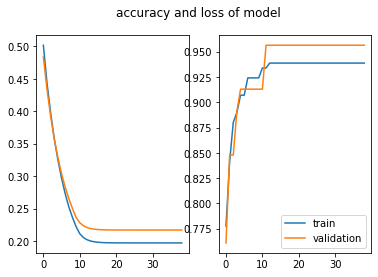

In [ ]:
evaluate(X_test, y_test, model1)
plot_loss(history1)

## 1 callback , batch size = 100, epochs = 100, optimizer = adam

In [ ]:
model2 = Sequential()
model2.add(Dense(units=15,kernel_initializer='he_uniform',activation='relu',input_dim=input_size))
model2.add(Dense(units=15,kernel_initializer='he_uniform',activation='relu'))
model2.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
start = time.time()
history2 = model2.fit(X_train, y_train, validation_split=0.1, batch_size= 100, epochs= 100, callbacks=[callback1])
end = time.time()
print('training time:' , end-start)

Epoch 1/100
5/5 [==============================] - 1s 48ms/step - loss: 1.1074 - accuracy: 0.1614 - val_loss: 0.9464 - val_accuracy: 0.2826
Epoch 2/100
5/5 [==============================] - 0s 11ms/step - loss: 0.9990 - accuracy: 0.1858 - val_loss: 0.8557 - val_accuracy: 0.3478
Epoch 3/100
5/5 [==============================] - 0s 9ms/step - loss: 0.9046 - accuracy: 0.2543 - val_loss: 0.7775 - val_accuracy: 0.4783
Epoch 4/100
5/5 [==============================] - 0s 12ms/step - loss: 0.8180 - accuracy: 0.3203 - val_loss: 0.7097 - val_accuracy: 0.4783
Epoch 5/100
5/5 [==============================] - 0s 13ms/step - loss: 0.7408 - accuracy: 0.4303 - val_loss: 0.6505 - val_accuracy: 0.5652
Epoch 6/100
5/5 [==============================] - 0s 11ms/step - loss: 0.6725 - accuracy: 0.5306 - val_loss: 0.5985 - val_accuracy: 0.6522
Epoch 7/100
5/5 [==============================] - 0s 13ms/step - loss: 0.6099 - accuracy: 0.6333 - val_loss: 0.5527 - val_accuracy: 0.7174
Epoch 8/100
5/5 [====

[[43  4]
 [ 4 63]]
accuracy = : 0.9298245614035088


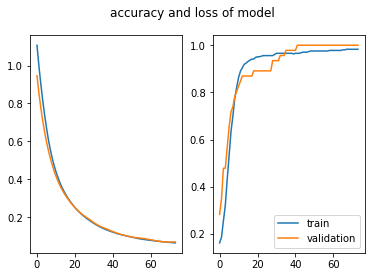

In [ ]:
evaluate(X_test, y_test, model2)
plot_loss(history2)

## 1 callbacks , batch size = 10, epochs = 100, optimizer = adam

In [ ]:
model3 = Sequential()
model3.add(Dense(units=15,kernel_initializer='he_uniform',activation='relu',input_dim=input_size))
model3.add(Dense(units=15,kernel_initializer='he_uniform',activation='relu'))
model3.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))
model3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history3 = model3.fit(X_train, y_train, validation_split=0.1, batch_size= 10, epochs= 100, callbacks=[callback1])
end = time.time()
print('training time:' , end-start)

Epoch 1/100
41/41 [==============================] - 1s 6ms/step - loss: 0.9623 - accuracy: 0.2714 - val_loss: 0.7309 - val_accuracy: 0.5000
Epoch 2/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5572 - accuracy: 0.6699 - val_loss: 0.5185 - val_accuracy: 0.7826
Epoch 3/100
41/41 [==============================] - 0s 3ms/step - loss: 0.3954 - accuracy: 0.8753 - val_loss: 0.3991 - val_accuracy: 0.9130
Epoch 4/100
41/41 [==============================] - 0s 3ms/step - loss: 0.2798 - accuracy: 0.9169 - val_loss: 0.3044 - val_accuracy: 0.9565
Epoch 5/100
41/41 [==============================] - 0s 2ms/step - loss: 0.2033 - accuracy: 0.9462 - val_loss: 0.2499 - val_accuracy: 0.9565
Epoch 6/100
41/41 [==============================] - 0s 3ms/step - loss: 0.1630 - accuracy: 0.9511 - val_loss: 0.2144 - val_accuracy: 0.9565
Epoch 7/100
41/41 [==============================] - 0s 3ms/step - loss: 0.1377 - accuracy: 0.9609 - val_loss: 0.1864 - val_accuracy: 0.9348
Epoch 8/100
4

[[46  1]
 [ 2 65]]
accuracy = : 0.9736842105263158


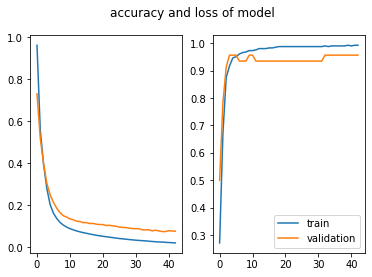

In [ ]:
evaluate(X_test, y_test, model3)
plot_loss(history3)

# changing optimizer

## RMS prop

In [ ]:
model4 = Sequential()
model4.add(Dense(units=15,kernel_initializer='he_uniform',activation='relu',input_dim=input_size))
model4.add(Dense(units=15,kernel_initializer='he_uniform',activation='relu'))
model4.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))
model4.compile(optimizer='RMSprop',loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history4 = model4.fit(X_train, y_train, validation_split=0.1, batch_size= 100, epochs= 100, callbacks=[callback1])
end = time.time()
print('training time:' , end-start)

Epoch 1/100
5/5 [==============================] - 1s 49ms/step - loss: 0.4572 - accuracy: 0.8606 - val_loss: 0.4414 - val_accuracy: 0.8696
Epoch 2/100
5/5 [==============================] - 0s 10ms/step - loss: 0.3695 - accuracy: 0.9144 - val_loss: 0.3849 - val_accuracy: 0.9130
Epoch 3/100
5/5 [==============================] - 0s 9ms/step - loss: 0.3214 - accuracy: 0.9291 - val_loss: 0.3437 - val_accuracy: 0.9348
Epoch 4/100
5/5 [==============================] - 0s 10ms/step - loss: 0.2860 - accuracy: 0.9340 - val_loss: 0.3108 - val_accuracy: 0.9565
Epoch 5/100
5/5 [==============================] - 0s 9ms/step - loss: 0.2584 - accuracy: 0.9364 - val_loss: 0.2817 - val_accuracy: 0.9565
Epoch 6/100
5/5 [==============================] - 0s 10ms/step - loss: 0.2348 - accuracy: 0.9438 - val_loss: 0.2562 - val_accuracy: 0.9565
Epoch 7/100
5/5 [==============================] - 0s 9ms/step - loss: 0.2147 - accuracy: 0.9462 - val_loss: 0.2358 - val_accuracy: 0.9565
Epoch 8/100
5/5 [======

[[46  1]
 [ 4 63]]
accuracy = : 0.956140350877193


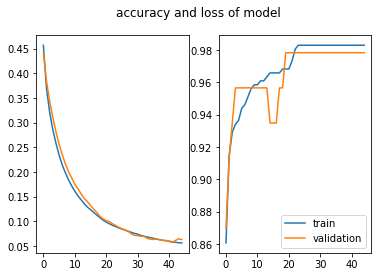

In [ ]:
evaluate(X_test, y_test, model4)
plot_loss(history4)

## SGD

In [ ]:
model5 = Sequential()
model5.add(Dense(units=15,kernel_initializer='he_uniform',activation='relu',input_dim=input_size))
model5.add(Dense(units=15,kernel_initializer='he_uniform',activation='relu'))
model5.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))
model5.compile(optimizer='SGD',loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history5 = model5.fit(X_train, y_train, validation_split=0.1, batch_size= 100, epochs= 100, callbacks=[callback1])
end = time.time()
print('training time:' , end-start)

Epoch 1/100
5/5 [==============================] - 1s 79ms/step - loss: 0.7577 - accuracy: 0.5672 - val_loss: 0.6908 - val_accuracy: 0.5870
Epoch 2/100
5/5 [==============================] - 0s 16ms/step - loss: 0.7156 - accuracy: 0.5966 - val_loss: 0.6625 - val_accuracy: 0.5870
Epoch 3/100
5/5 [==============================] - 0s 14ms/step - loss: 0.6835 - accuracy: 0.6112 - val_loss: 0.6324 - val_accuracy: 0.5870
Epoch 4/100
5/5 [==============================] - 0s 11ms/step - loss: 0.6509 - accuracy: 0.6235 - val_loss: 0.6096 - val_accuracy: 0.6087
Epoch 5/100
5/5 [==============================] - 0s 11ms/step - loss: 0.6257 - accuracy: 0.6381 - val_loss: 0.5885 - val_accuracy: 0.6087
Epoch 6/100
5/5 [==============================] - 0s 13ms/step - loss: 0.6027 - accuracy: 0.6430 - val_loss: 0.5708 - val_accuracy: 0.6087
Epoch 7/100
5/5 [==============================] - 0s 11ms/step - loss: 0.5831 - accuracy: 0.6504 - val_loss: 0.5535 - val_accuracy: 0.6522
Epoch 8/100
5/5 [===

[[42  5]
 [ 4 63]]
accuracy = : 0.9210526315789473


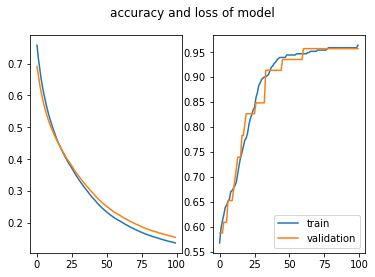

In [ ]:
evaluate(X_test, y_test, model5)
plot_loss(history5)